In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as xet
import tensorflow as tf

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Read Data

In [3]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./annotations\Cars0.xml,226,419,125,173
1,./annotations\Cars1.xml,134,262,128,160
2,./annotations\Cars10.xml,140,303,5,148
3,./annotations\Cars100.xml,175,214,114,131
4,./annotations\Cars101.xml,167,240,202,220


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  433 non-null    object
 1   xmin      433 non-null    int64 
 2   xmax      433 non-null    int64 
 3   ymin      433 non-null    int64 
 4   ymax      433 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.0+ KB


In [5]:
filename = df['filepath'][0]
filename

'./annotations\\Cars0.xml'

In [6]:
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('./images/', filename_image)
    return filepath_image

In [7]:
getFilename(filename)

'./images/Cars0.png'

In [8]:
image_path = list(df['filepath'].apply(getFilename))
image_path

['./images/Cars0.png',
 './images/Cars1.png',
 './images/Cars10.png',
 './images/Cars100.png',
 './images/Cars101.png',
 './images/Cars102.png',
 './images/Cars103.png',
 './images/Cars104.png',
 './images/Cars105.png',
 './images/Cars106.png',
 './images/Cars107.png',
 './images/Cars108.png',
 './images/Cars109.png',
 './images/Cars11.png',
 './images/Cars110.png',
 './images/Cars111.png',
 './images/Cars112.png',
 './images/Cars113.png',
 './images/Cars114.png',
 './images/Cars115.png',
 './images/Cars116.png',
 './images/Cars117.png',
 './images/Cars118.png',
 './images/Cars119.png',
 './images/Cars12.png',
 './images/Cars120.png',
 './images/Cars121.png',
 './images/Cars122.png',
 './images/Cars123.png',
 './images/Cars124.png',
 './images/Cars125.png',
 './images/Cars126.png',
 './images/Cars127.png',
 './images/Cars128.png',
 './images/Cars129.png',
 './images/Cars13.png',
 './images/Cars130.png',
 './images/Cars131.png',
 './images/Cars132.png',
 './images/Cars133.png',
 './imag

## Verify Image and Output

In [9]:
file_path = image_path[0]
file_path

'./images/Cars0.png'

In [10]:
img = cv2.imread(file_path)

# cv2.namedWindow('example', cv2.WINDOW_NORMAL) # for resize
# cv2.imshow('example', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
# Create bounding box
# 226 419 125 173
# cv2.rectangle(img, (226,125), (419,173), (0,255,0), 3)
# cv2.namedWindow('example', cv2.WINDOW_NORMAL) # for resize
# cv2.imshow('example', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [13]:
labels = df.iloc[:,1:].values
data = []
output = []

for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [14]:
label_norm

(0.18666666666666668, 0.6986666666666667, 0.396, 0.542)

In [15]:
load_image_arr

array([[[242., 247., 251.],
        [168., 175., 183.],
        [147., 161., 172.],
        ...,
        [101., 111., 120.],
        [ 89.,  99., 108.],
        [ 94., 104., 113.]],

       [[249., 250., 252.],
        [230., 233., 238.],
        [188., 196., 206.],
        ...,
        [ 99., 113., 124.],
        [ 83.,  97., 108.],
        [ 88., 102., 113.]],

       [[251., 250., 248.],
        [254., 254., 255.],
        [245., 250., 254.],
        ...,
        [ 99., 117., 131.],
        [ 82., 100., 114.],
        [ 92., 110., 124.]],

       ...,

       [[ 97.,  81.,  48.],
        [ 96.,  80.,  47.],
        [ 95.,  79.,  46.],
        ...,
        [101.,  87.,  58.],
        [103.,  89.,  60.],
        [ 98.,  84.,  55.]],

       [[104.,  79.,  57.],
        [100.,  78.,  54.],
        [ 96.,  77.,  44.],
        ...,
        [ 91.,  77.,  48.],
        [ 94.,  80.,  51.],
        [ 96.,  82.,  53.]],

       [[ 98.,  73.,  51.],
        [ 97.,  75.,  51.],
        [ 97.,  

In [16]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [17]:
X.shape, y.shape

((433, 224, 224, 3), (433, 4))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

## Model

In [19]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model

In [20]:
inception_resnet = InceptionV3(weights="imagenet",include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable=False

headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)

model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [21]:
# Compile Model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 activation_6 (Activation)      (None, 25, 25, 48)   0           ['batch_normalization_6[0][0]']  
                                                                                                  
 activation_9 (Activation)      (None, 25, 25, 96)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 average_pooling2d (AveragePool  (None, 25, 25, 192)  0          ['max_pooling2d_1[0][0]']        
 ing2D)                                                                                           
                                                                                                  
 conv2d_5 (Conv2D)              (None, 25, 25, 64)   12288       ['max_pooling2d_1[0][0]']        
                                                                                                  
 conv2d_7 

## Model Training

In [22]:
from tensorflow.keras.callbacks import TensorBoard

In [23]:
tfb = TensorBoard('object_detection')

In [24]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/100
35/35 [==============================] - 10s 120ms/step - loss: 0.1492 - val_loss: 0.1507
Epoch 2/100
35/35 [==============================] - 3s 72ms/step - loss: 0.1607 - val_loss: 0.1564
Epoch 3/100
35/35 [==============================] - 3s 72ms/step - loss: 0.1503 - val_loss: 0.1537
Epoch 4/100
35/35 [==============================] - 3s 73ms/step - loss: 0.1450 - val_loss: 0.1716
Epoch 5/100
35/35 [==============================] - 3s 74ms/step - loss: 0.1430 - val_loss: 0.1430
Epoch 6/100
35/35 [==============================] - 3s 74ms/step - loss: 0.1338 - val_loss: 0.1405
Epoch 7/100
35/35 [==============================] - 3s 74ms/step - loss: 0.1334 - val_loss: 0.1515
Epoch 8/100
35/35 [==============================] - 3s 74ms/step - loss: 0.1334 - val_loss: 0.1407
Epoch 9/100
35/35 [==============================] - 3s 74ms/step - loss: 0.1298 - val_loss: 0.1374
Epoch 10/100
35/35 [==============================] - 3s 74ms/step - loss: 0.0941 - val_loss: 0.11

<Axes: >

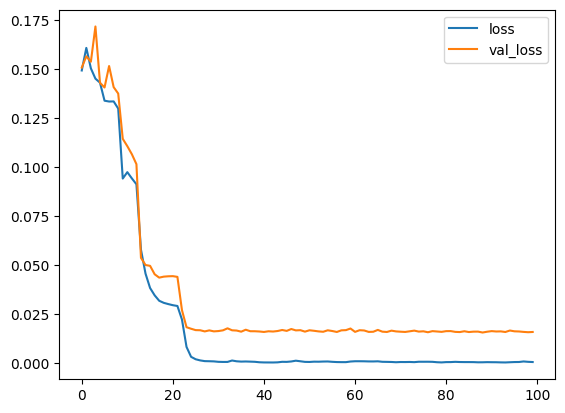

In [25]:
pd.DataFrame(history.history).plot(kind='line')

In [26]:
# Log
model.save('./model/object_detection.h5')

## Prediction

In [27]:
# Pipeline
def object_detection(path):
    
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 1s 1s/step
(351, 177) (386, 170)


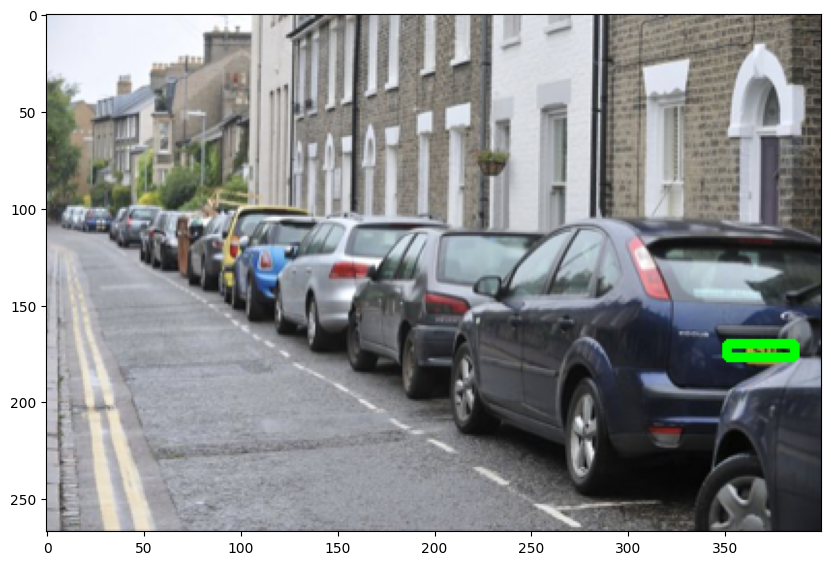

In [28]:
path = "./images/Cars127.png"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Optical Character Recognition - OCR

In [29]:
import pytesseract as pt

1/1 [==============================] - 0s 32ms/step


(237, 126) (428, 165)


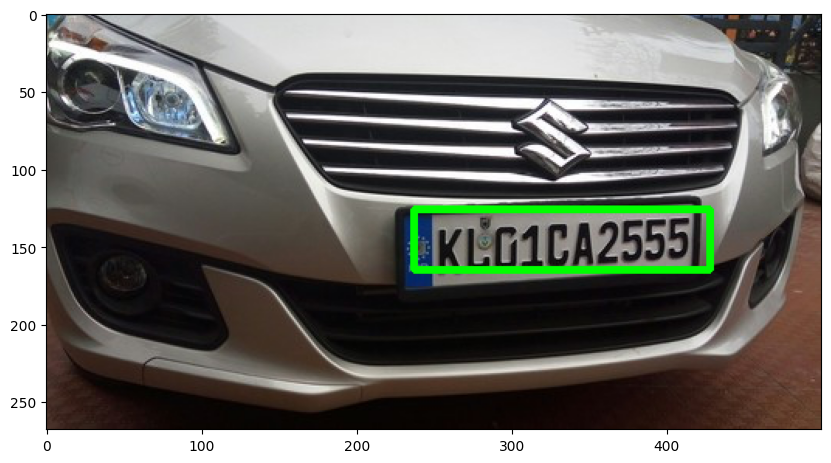

In [30]:
path = "./images/Cars0.png"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [31]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

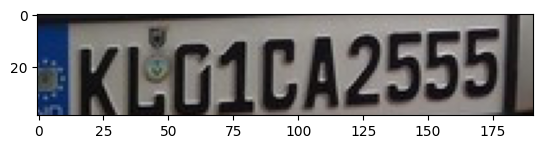

In [32]:
plt.imshow(roi)
plt.show()

In [33]:
# Extract Text from Image
text = pt.image_to_string(roi)
print(text)

AV IEG ICA2555)



## Training 2

In [34]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=200,
                    validation_data=(x_test,y_test),callbacks=[tfb],initial_epoch=100)

Epoch 101/200
35/35 [==============================] - 3s 79ms/step - loss: 6.1117e-04 - val_loss: 0.0165
Epoch 102/200
35/35 [==============================] - 3s 83ms/step - loss: 7.6114e-04 - val_loss: 0.0166
Epoch 103/200
35/35 [==============================] - 3s 83ms/step - loss: 7.7269e-04 - val_loss: 0.0161
Epoch 104/200
35/35 [==============================] - 3s 83ms/step - loss: 8.8980e-04 - val_loss: 0.0161
Epoch 105/200
35/35 [==============================] - 3s 83ms/step - loss: 7.5539e-04 - val_loss: 0.0162
Epoch 106/200
35/35 [==============================] - 3s 84ms/step - loss: 7.3447e-04 - val_loss: 0.0161
Epoch 107/200
35/35 [==============================] - 3s 84ms/step - loss: 8.5729e-04 - val_loss: 0.0166
Epoch 108/200
35/35 [==============================] - 3s 84ms/step - loss: 0.0012 - val_loss: 0.0167
Epoch 109/200
35/35 [==============================] - 3s 83ms/step - loss: 9.6092e-04 - val_loss: 0.0160
Epoch 110/200
35/35 [=============================

<Axes: >

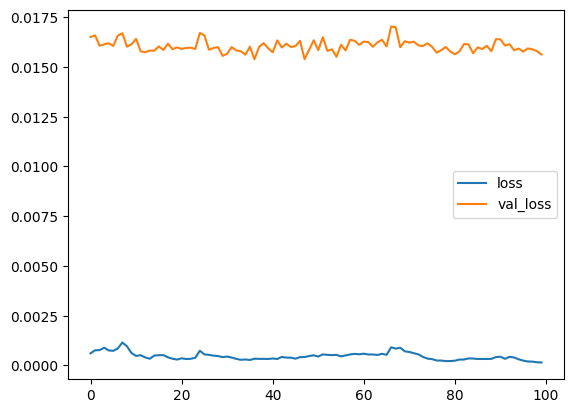

In [35]:
pd.DataFrame(history.history).plot(kind='line')

1/1 [==============================] - 0s 34ms/step
(358, 164) (385, 172)


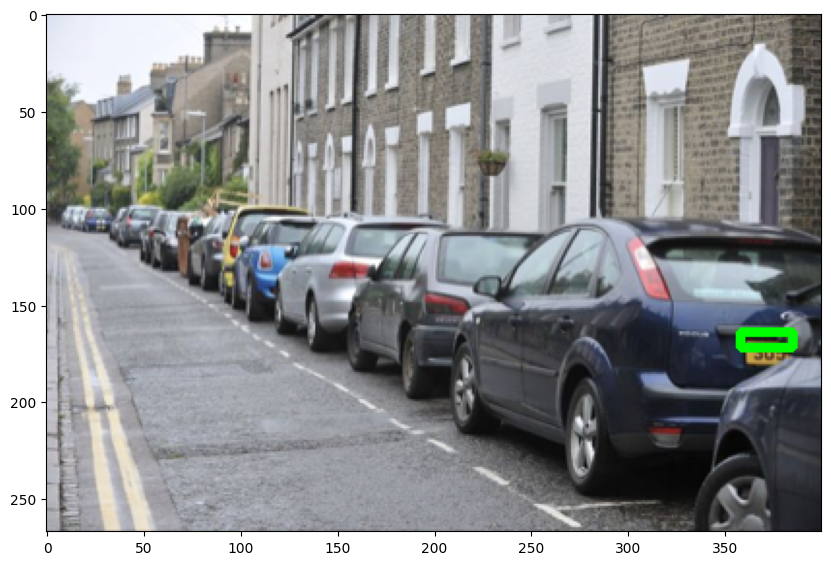

In [36]:
path = "./images/Cars127.png"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 29ms/step
(228, 127) (423, 174)


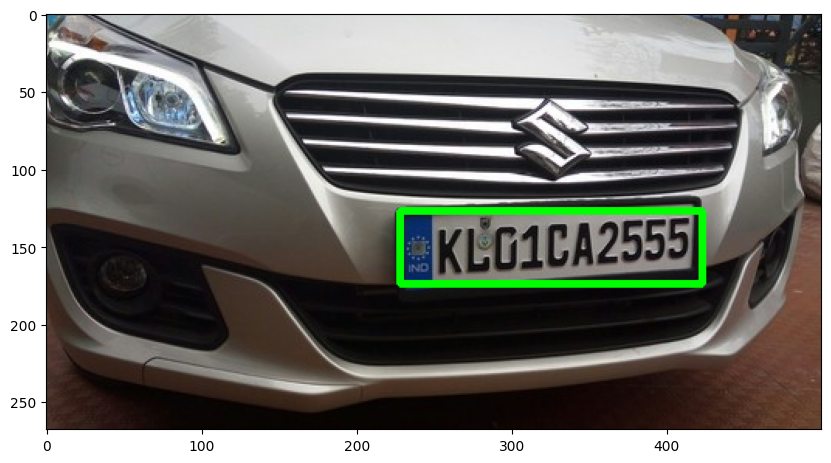

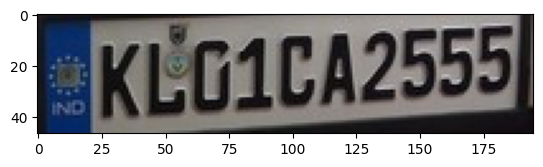

In [43]:
path = "./images/Cars0.png"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

img = np.array(load_img(path))
xmin, xmax, ymin, ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

plt.imshow(roi)
plt.show()

In [44]:
text = pt.image_to_string(roi)
print(text)

FKLG10A2559|

